# Problem Statement

* To identify number of users which are performing credit card frauds.

# Data Preprocessing

In [4]:
#Importing libraries required for Data analysis, Visualization and Deep learning. 
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split,GridSearchCV
from tensorflow.keras.callbacks import History
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
print("Libraries Imported Successfully")

Libraries Imported Successfully


In [6]:
# Lets take a look at our dataset
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
# Columns of the dataset
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Here Column "class" is our Target variable
* where 0 -> Credit Card Fraud didnot occur
* and   1 -> Credit Card Fraud occur

In [8]:
# Shape of the data
data.shape

(284807, 31)

In [9]:
# Datatypes of ur dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
# Statistical Data of our dataset
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
# Checking if our dataset contains any null values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

* Therefore, our dataset doesnot contain any null values.

In [12]:
# Normalizing the Amount Column
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data["Amount"] = scaler.fit_transform(data["Amount"].values.reshape(-1,1))
data["Amount"]

0         0.244964
1        -0.342475
2         1.160686
3         0.140534
4        -0.073403
            ...   
284802   -0.350151
284803   -0.254117
284804   -0.081839
284805   -0.313249
284806    0.514355
Name: Amount, Length: 284807, dtype: float64

In [13]:
# Now lets take a look again at our dataset
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [14]:
# Since Time is not needed for prediction so we are dropping that column
data = data.drop(columns="Time")
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


# Data Visualization

<AxesSubplot:xlabel='Class', ylabel='count'>

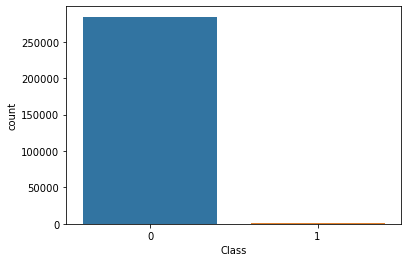

In [15]:
# Countplot Showing target variable
sns.countplot(data = data, x = data["Class"])

* Now we know that there we very less number of frauds.

In [28]:
# Lets count the number of credit card frauds
count = data[data["Class"]==1].count().sum()
print("Number of Credit card frauds:",count)

Number of Credit card frauds: 14760


# Deploying Deep Learning Model

In [39]:
# Assigning Variables
X = data.iloc[: ,:-1].values
y = data["Class"].values

In [40]:
print(X)
print(y)

[[-1.35980713e+00 -7.27811733e-02  2.53634674e+00 ...  1.33558377e-01
  -2.10530535e-02  2.44964263e-01]
 [ 1.19185711e+00  2.66150712e-01  1.66480113e-01 ... -8.98309914e-03
   1.47241692e-02 -3.42474541e-01]
 [-1.35835406e+00 -1.34016307e+00  1.77320934e+00 ... -5.53527940e-02
  -5.97518406e-02  1.16068593e+00]
 ...
 [ 1.91956501e+00 -3.01253846e-01 -3.24963981e+00 ...  4.45477214e-03
  -2.65608286e-02 -8.18393021e-02]
 [-2.40440050e-01  5.30482513e-01  7.02510230e-01 ...  1.08820735e-01
   1.04532821e-01 -3.13248531e-01]
 [-5.33412522e-01 -1.89733337e-01  7.03337367e-01 ... -2.41530880e-03
   1.36489143e-02  5.14355311e-01]]
[0 0 0 ... 0 0 0]


In [42]:
# Splitting data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = None)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[-2.71964956e-01  9.98617012e-01 -1.15174208e+00 ... -4.20955431e-01
  -2.53421939e-01  7.07813483e-03]
 [ 1.18744221e+00 -5.17662150e-01  9.85328056e-01 ...  8.28911050e-02
   2.21060844e-02 -3.45233221e-01]
 [ 1.05090396e+00 -1.25961071e+00  4.64493114e-01 ...  2.34611632e-03
   3.88809620e-02  4.02408898e-01]
 ...
 [-5.70364899e+00  3.20513669e+00 -1.89376628e+00 ... -4.70372499e-02
   3.63831134e-02 -1.54364586e-01]
 [-5.73625305e-01  9.61993373e-01 -5.63204214e-01 ... -2.27501901e-01
  -1.44669297e-01 -2.43322003e-01]
 [-6.79236380e-01  1.67157061e+00 -3.73780720e-01 ... -1.42094072e+00
  -7.75825068e-01 -3.44153737e-01]]
[[ 2.03499679e+00  2.73057864e-01 -3.84855215e+00 ...  3.85712096e-02
   1.00322414e-03 -3.49231307e-01]
 [ 1.31433710e+00  5.70677732e-01 -6.72323423e-01 ... -3.61225873e-02
   3.11005414e-02 -3.50190847e-01]
 [-8.43448863e-01  3.71714328e-01  7.49429934e-02 ...  8.89110511e-02
   2.13061451e-01 -3.18126196e-01]
 ...
 [ 1.26943654e+00 -7.57880599e-01 -7.1309822

In [44]:
# Deep Neural Network
from tensorflow.keras.models import Sequential
classifier = Sequential()

dropout = 0.25
history = History()

# Creating Layers
classifier.add(Dense(units = 24, activation = "relu"))
classifier.add(Dropout(dropout))

classifier.add(Dense(units = 24, activation = "relu"))
classifier.add(Dropout(dropout))

classifier.add(Dense(units = 24, activation = "relu"))
classifier.add(Dropout(dropout))

classifier.add(Dense(units = 1, activation = "sigmoid"))  #output layer

classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

classifier.fit(X_train, y_train, epochs=10, batch_size=32, callbacks=[history])

Epoch 1/10
7121/7121 [==============================] - 10s 1ms/step - loss: 0.0132 - accuracy: 0.9974
Epoch 2/10
7121/7121 [==============================] - 13s 2ms/step - loss: 0.0046 - accuracy: 0.9992
Epoch 3/10
7121/7121 [==============================] - 9s 1ms/step - loss: 0.0040 - accuracy: 0.9993
Epoch 4/10
7121/7121 [==============================] - 9s 1ms/step - loss: 0.0040 - accuracy: 0.9993
Epoch 5/10
7121/7121 [==============================] - 9s 1ms/step - loss: 0.0037 - accuracy: 0.9994
Epoch 6/10
7121/7121 [==============================] - 10s 1ms/step - loss: 0.0039 - accuracy: 0.9993
Epoch 7/10
7121/7121 [==============================] - 10s 1ms/step - loss: 0.0036 - accuracy: 0.9993
Epoch 8/10
7121/7121 [==============================] - 10s 1ms/step - loss: 0.0033 - accuracy: 0.9993 0s - loss: 0.0033 - accuracy: 
Epoch 9/10
7121/7121 [==============================] - 11s 1ms/step - loss: 0.0034 - accuracy: 0.9993
Epoch 10/10
7121/7121 [======================

In [45]:
y_pred = classifier.predict(X_test)
y_pred = y_pred>0.5

In [49]:
# cheking accuracy of our model
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[56856    12]
 [   22    72]]


In [50]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.86      0.77      0.81        94

    accuracy                           1.00     56962
   macro avg       0.93      0.88      0.90     56962
weighted avg       1.00      1.00      1.00     56962



<AxesSubplot:>

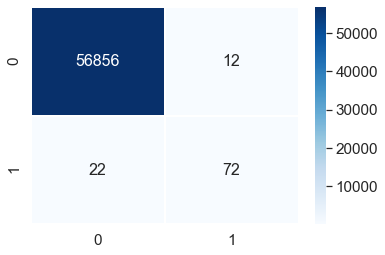

In [52]:
#sns.set(font_scale=1.4)  
sns.heatmap(cm , annot=True , cmap = "Blues"  , fmt= "g", linewidths = 1, annot_kws= {"size" : 16})

Therefore this is our final result.